In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
dataset = dataset.iloc[:,2:]
dataset.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


In [ ]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

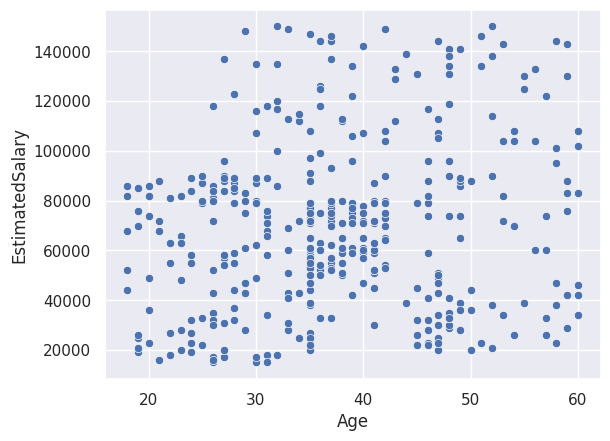

In [ ]:
sns.scatterplot(x=dataset['Age'], y=dataset['EstimatedSalary'])
plt.show()

In [ ]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
x = dataset.iloc[:,0:2]
y = dataset.iloc[:,-1]

In [ ]:
x.head()

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# Case 1 - MLP Model without feature scaling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x, y, epochs=500, validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 1s 22ms/step - loss: 990.0267 - accuracy: 0.5063 - val_loss: 845.6016 - val_accuracy: 0.3625
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 307.8742 - accuracy: 0.4500 - val_loss: 51.3410 - val_accuracy: 0.3625
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 126.1559 - accuracy: 0.6438 - val_loss: 149.0262 - val_accuracy: 0.6375
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 135.7732 - accuracy: 0.5813 - val_loss: 70.6944 - val_accuracy: 0.6375
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 165.8290 - accuracy: 0.5188 - val_loss: 329.7092 - val_accuracy: 0.3625
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 98.0745 - accuracy: 0.5188 - val_loss: 94.7231 - val_accuracy: 0.3625
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 61.8284 - accuracy: 0.5719 - val_loss: 37.3779 - val_accurac

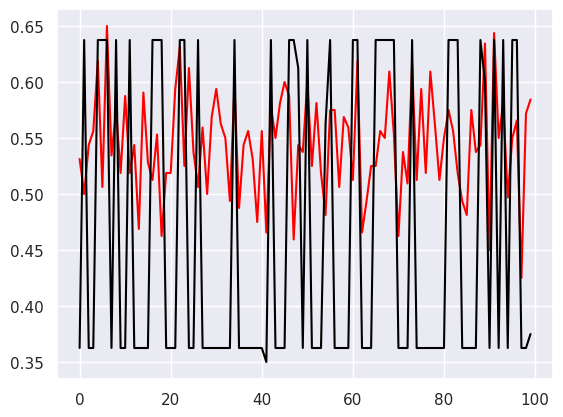

In [ ]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='black')

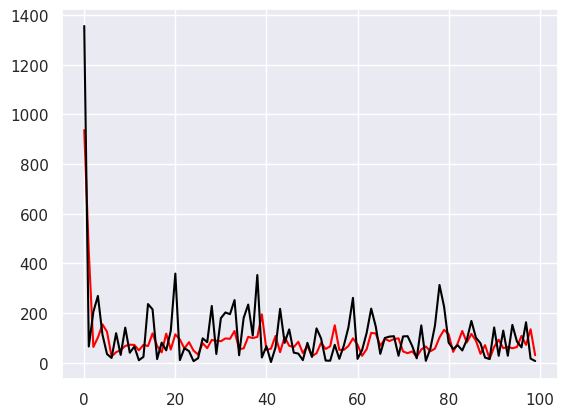

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')

# Case 2 - MLP Model with feature scaled value

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
pd.DataFrame(x_scaled)

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


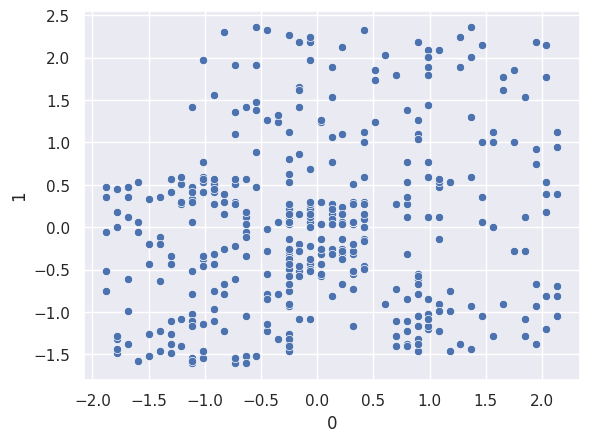

In [ ]:
sns.scatterplot(x=pd.DataFrame(x_scaled)[0], y=pd.DataFrame(x_scaled)[1])
plt.show()

In [ ]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_scaled, y, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 0.6414 - accuracy: 0.8094 - val_loss: 0.6547 - val_accuracy: 0.6375
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5802 - accuracy: 0.8094 - val_loss: 0.6336 - val_accuracy: 0.6625
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5308 - accuracy: 0.8125 - val_loss: 0.6135 - val_accuracy: 0.6750
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4897 - accuracy: 0.8250 - val_loss: 0.5973 - val_accuracy: 0.6875
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4560 - accuracy: 0.8219 - val_loss: 0.5837 - val_accuracy: 0.7000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4276 - accuracy: 0.8250 - val_loss: 0.5664 - val_accuracy: 0.7000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4036 - accuracy: 0.8375 - val_loss: 0.5476 - val_accuracy: 0.7125
Epoch 8/100


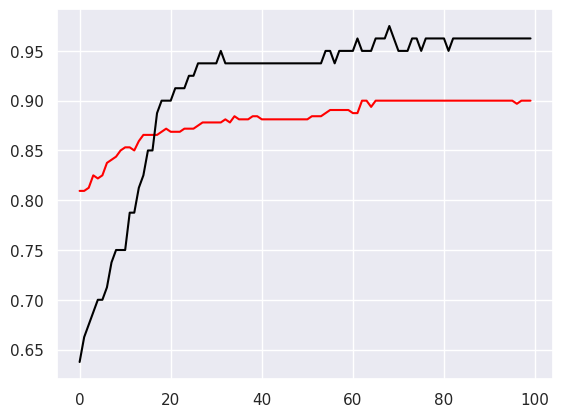

In [ ]:
plt.plot(history1.history['accuracy'], color='red')
plt.plot(history1.history['val_accuracy'], color='black')

# Regularization Method

In [ ]:
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [ ]:
x, y = make_moons(100, noise=0.25, random_state=2)

In [ ]:
pd.DataFrame(x).describe()

,0,1
count,100.000000,100.000000
mean,0.506007,0.223081
std,0.916620,0.543349
min,-1.498210,-0.860586
25%,-0.119066,-0.238133
50%,0.623499,0.183742
75%,1.138448,0.667427
max,2.308380,1.322826


In [ ]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

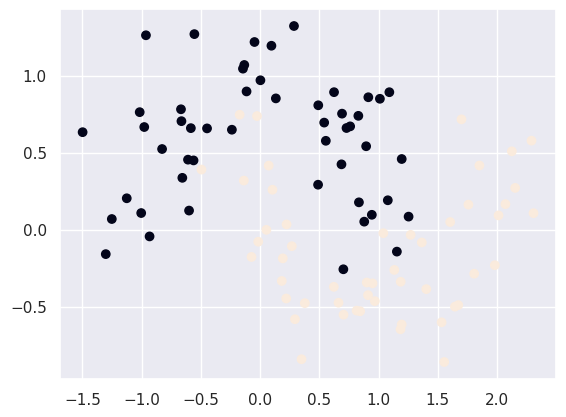

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs=100, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 15s 2ms/step


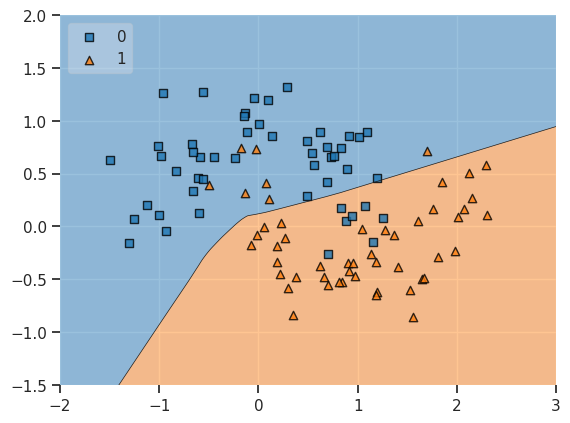

In [ ]:
plot_decision_regions(x, y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

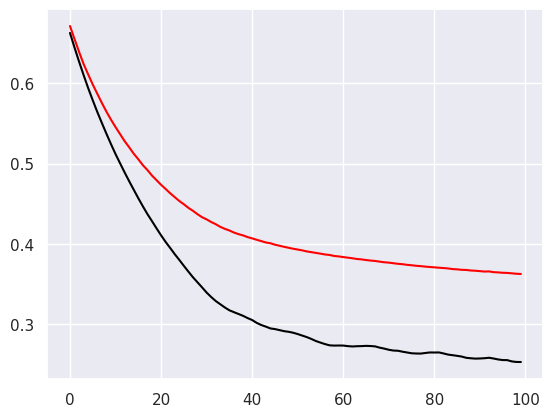

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')

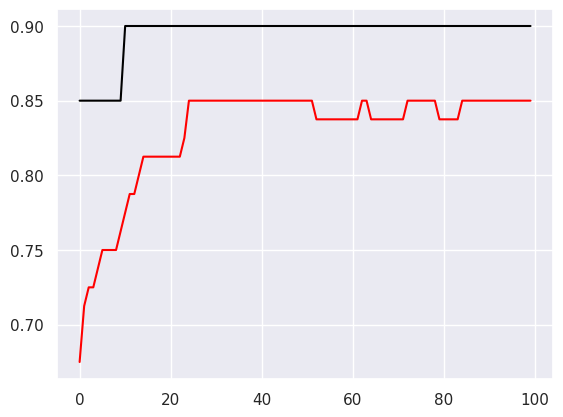

In [ ]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='black')

In [ ]:
model1 = Sequential()
model1.add(Dense(128, input_dim=2, activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.01))) # l2 : it's L2- ridge method
#model1.add(Dense(128, input_dim=2, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01))) # it's L1 - Lasso method
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x,y, epochs=100, validation_split=0.2, verbose=0)

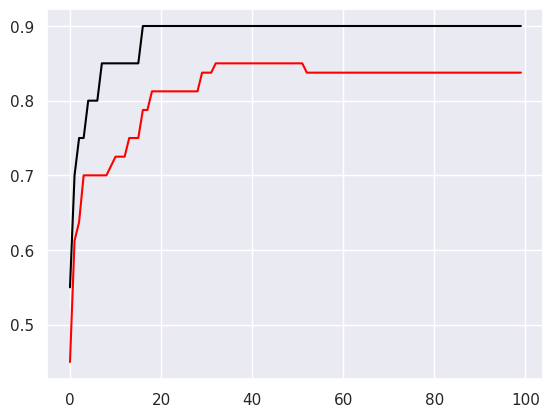

In [ ]:
plt.plot(history1.history['accuracy'], color='red')
plt.plot(history1.history['val_accuracy'], color='black')

9600/9600 [==============================] - 14s 1ms/step


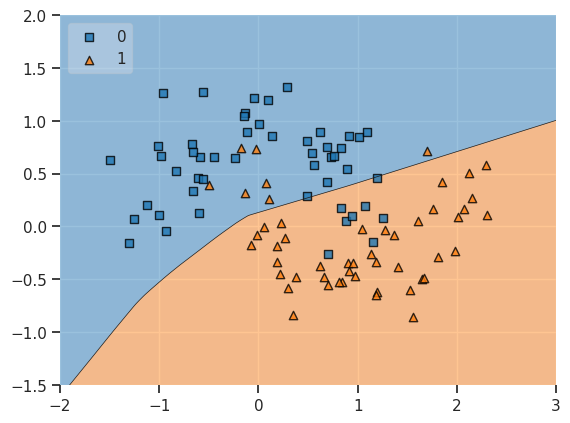

In [ ]:
plot_decision_regions(x, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()